(891, 12)
(418, 11)
     PassengerId  Survived  Pclass                                      Name  \
886          887         0       2                     Montvila, Rev. Juozas   
887          888         1       1              Graham, Miss. Margaret Edith   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   
889          890         1       1                     Behr, Mr. Karl Howell   
890          891         0       3                       Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch      Ticket   Fare Cabin Embarked  
886    male  27.0      0      0      211536  13.00   NaN        S  
887  female  19.0      0      0      112053  30.00   B42        S  
888  female   NaN      1      2  W./C. 6607  23.45   NaN        S  
889    male  26.0      0      0      111369  30.00  C148        C  
890    male  32.0      0      0      370376   7.75   NaN        Q  
PassengerId      int64
Survived         int64
Pclass           int64
Name            object

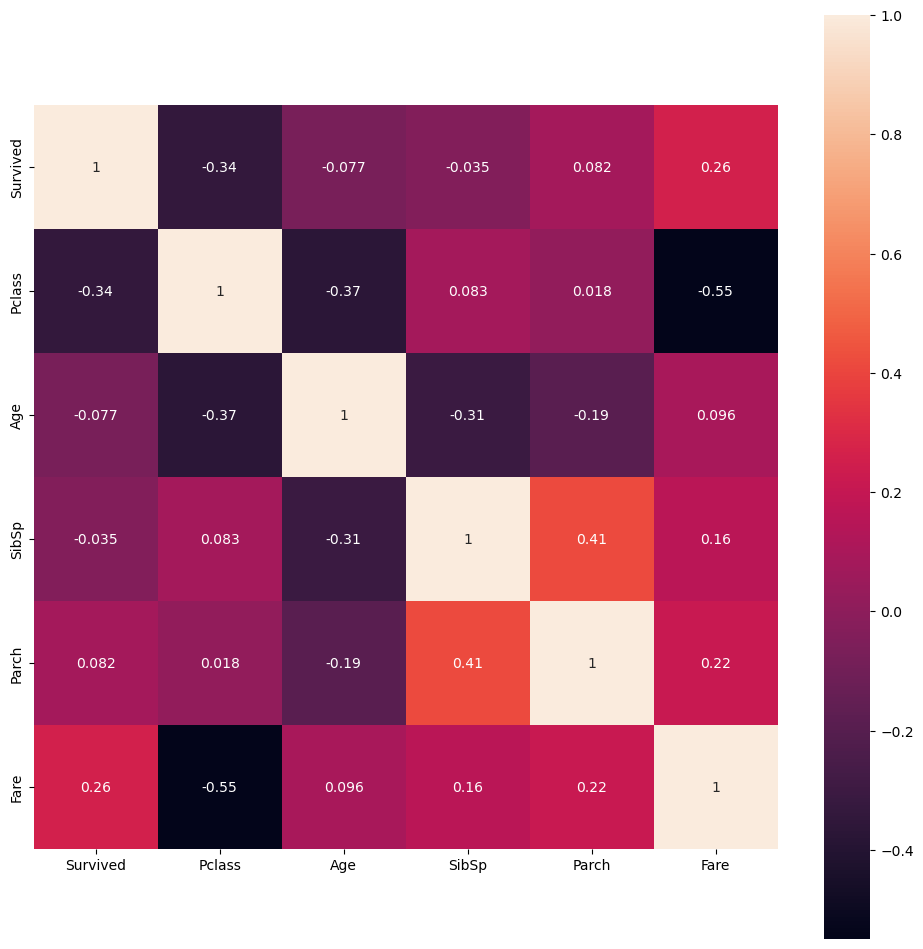

<Figure size 640x480 with 0 Axes>

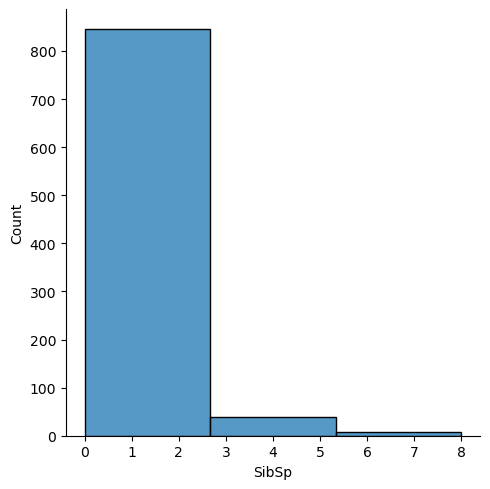

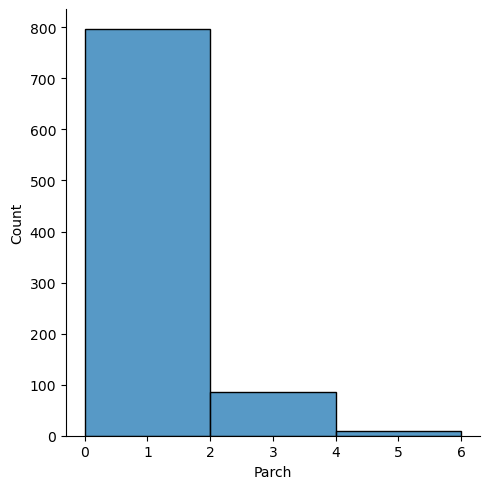

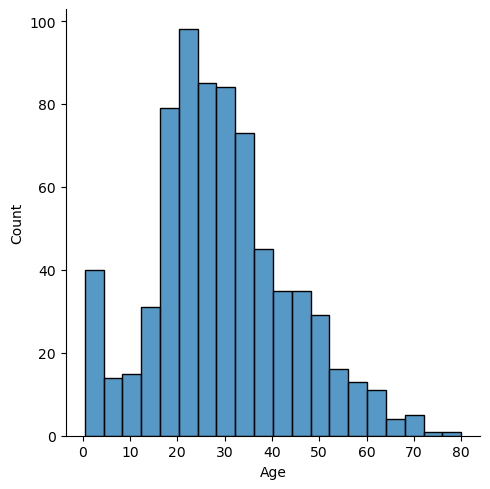

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
print(train.shape)
#(891,12),891 records for training, each record has 12 items
print(test.shape)
#(418,11),418 records for testing/prediction, each record has 11 items, survival is excluded. print(train.head(10))
print(train.tail())
#check the first 10 and the last 5 records
print(train.dtypes)
#types of the features, object is strting and cant be processed directly
featureList = train.columns.tolist()
print(featureList)
#lsit of feature names
train.info()
test.info()
print(train.iloc[:,2:].describe())
print(test.iloc[:,1:].describe())
#get a rough idea of the numerical summary
#ignore the passenger id and the survival
fig = plt.figure(figsize=(12,12))
sns.heatmap(train.iloc[:,1:].corr(),vmax=1,square=True,annot=True)
#brief idea about the correlation between features
print(train['Survived'].value_counts())
print(train['Embarked'].value_counts())
print(train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived'))
print(train.groupby(['Sex','Survived'])['Survived'].count())
#group together and appreciate the difference using groupby function
fig = plt.figure()
sns.displot(train['SibSp'],bins=3,kde=False)
sns.displot(train['Parch'],bins=3,kde=False)
sns.displot(train['Age'],bins=20)
#an error would occur, please check the reason(file path was incorrect)
#have a quick look at the enumeration of each item/feature
#more to be added by yourself

In [19]:
import pandas as pd
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
print(train.isnull())
print(train.notnull())

#locate the missing values
train2 = train.dropna()

#remove records/rows with null/nan value in it
train3 = train.dropna(axis=1)
#remove columns with null/nan value in it
print(train.shape)
print(train2.shape)
print(train3.shape)
print(train.info())
train4 = train.fillna(-1)

#fill in the missing values with arguments
print(train4.info())
train5 = train.fillna(method='pad')
#fill method ‘backfill’, ‘bfill’, ‘pad’, ‘ffill’, None
train6 = train.fillna(train.mean())
train62 = train.fillna(train.median())
#use the mean or median numerical value to fill in the missing value
print(train.median())
train7 = train.fillna(train.mean()['Age':'Age'])
#be selective of the input and output
print(train7.info())


     PassengerId  Survived  Pclass   Name    Sex    Age  SibSp  Parch  Ticket  \
0          False     False   False  False  False  False  False  False   False   
1          False     False   False  False  False  False  False  False   False   
2          False     False   False  False  False  False  False  False   False   
3          False     False   False  False  False  False  False  False   False   
4          False     False   False  False  False  False  False  False   False   
..           ...       ...     ...    ...    ...    ...    ...    ...     ...   
886        False     False   False  False  False  False  False  False   False   
887        False     False   False  False  False  False  False  False   False   
888        False     False   False  False  False   True  False  False   False   
889        False     False   False  False  False  False  False  False   False   
890        False     False   False  False  False  False  False  False   False   

      Fare  Cabin  Embarked

C:\Users\darin\AppData\Local\Temp\ipykernel_29836\534140476.py:23: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train6 = train.fillna(train.mean())
C:\Users\darin\AppData\Local\Temp\ipykernel_29836\534140476.py:24: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train62 = train.fillna(train.median())
C:\Users\darin\AppData\Local\Temp\ipykernel_29836\534140476.py:26: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(train.median())
C:\Users\darin\AppData\Local\Temp\ipykernel_29836\5341

<class 'pandas.core.frame.DataFrame'>
Int64Index: 177 entries, 5 to 888
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  177 non-null    int64  
 1   Pclass    177 non-null    int64  
 2   Sex       177 non-null    int32  
 3   Age       0 non-null      float64
 4   SibSp     177 non-null    int64  
 5   Parch     177 non-null    int64  
 6   Fare      177 non-null    float64
 7   Embarked  177 non-null    int32  
dtypes: float64(2), int32(2), int64(4)
memory usage: 11.1 KB
    Survived  Pclass  Sex  Age  SibSp  Parch     Fare  Embarked
5          0       3    1  NaN      0      0   8.4583         2
17         1       2    1  NaN      0      0  13.0000         1
19         1       3    0  NaN      0      0   7.2250         0
26         0       3    1  NaN      0      0   7.2250         0
28         1       3    0  NaN      0      0   7.8792         2
<class 'pandas.core.frame.DataFrame'>
Int64Index: 177 entries

C:\Users\darin\AppData\Local\Temp\ipykernel_29836\1885033626.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testAge.loc[:,'Age'] = rf_reg.predict(testAgeX)


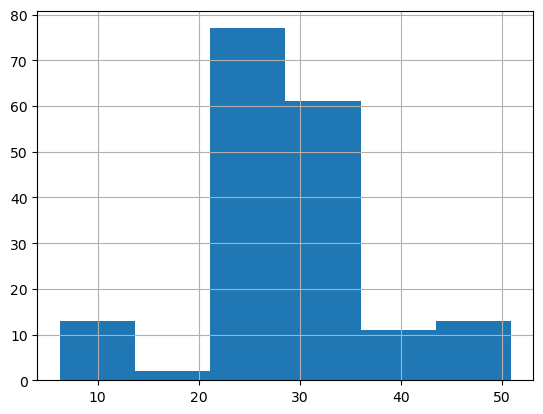

In [16]:
import pandas as pd
from sklearn import linear_model
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train['Sex'] = train['Sex'].map( {'male':1,'female':0} )
train['Sex'] = train['Sex'].astype(int)
train['Embarked'] = train['Embarked'].map( {'Q':2,'S':1,'C':0} )
train['Embarked'] = train['Embarked'].fillna(train['Embarked'].median())
train['Embarked'] = train['Embarked'].astype(int)
train = train.drop(['PassengerId','Cabin','Name','Ticket'],axis=1)
trainAge = train[train['Age'].notnull()]
testAge = train[train['Age'].isnull()]
testAge.info()
print(testAge.head())
trainAgeX = trainAge.drop(['Age'],axis=1)
trainAgeY = trainAge['Age']
testAgeX = testAge.drop(['Age'],axis=1)
#random forest regressor
rf_reg = RandomForestRegressor(max_depth=5, random_state=1)
rf_reg.fit(trainAgeX, trainAgeY)
testAge.loc[:,'Age'] = rf_reg.predict(testAgeX)
testAge['Age'].hist(bins=6)
testAge.info()

Series([], Name: Age, dtype: float64)
205    2.0
Name: Age, dtype: float64


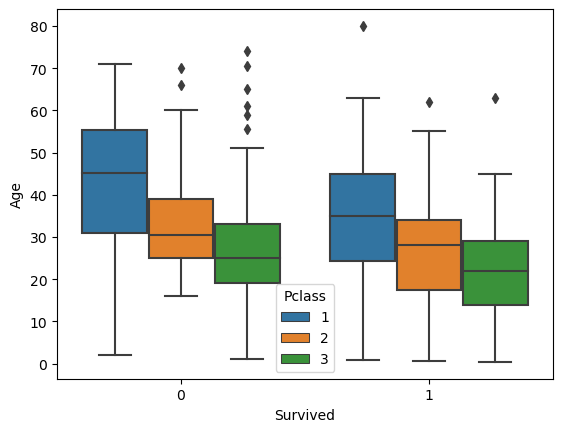

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
fig = plt.figure()
sns.boxplot(x='Survived', y='Age', hue='Pclass', data=train)
train2 = train.dropna()
perAge = np.percentile(train2['Age'],[0,25,50,75,100])
IQR = perAge[3]-perAge[1]
upperAge = perAge[3]+IQR*1.5
lowerAge = perAge[1]-IQR*1.5
print(train2.loc[(train2['Age'] > upperAge) | (train2['Age'] < lowerAge), 'Age'])
#outliers identified with age>upper or age<lower
#please check the results and explain why
train3 = train2[(train2['Pclass']==3) & (train2['Survived']==0)]
perAge = np.percentile(train3['Age'],[0,25,50,75,100])
IQR = perAge[3]-perAge[1]
upperAge = perAge[3]+IQR*1.5
lowerAge = perAge[1]-IQR*1.5
print(train3.loc[(train3['Age'] > upperAge) | (train3['Age'] < lowerAge), 'Age'])
#here we use 1.5 IQR to examine the outliers